**Author:** Gaetano Antonicchio


# --------------------------------------------
# Extract Time Series from .mp3 data
# --------------------------------------------

In [18]:
%matplotlib inline
import os,sys,inspect
PATH = '/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2'
sys.path.insert(0, PATH)

import pandas as pd
import numpy as np
from fma_metadata import utils
import matplotlib.pyplot as plt

In [21]:
t = pd.read_csv('/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2/src/Module 3/ts_dataset.csv')

In [22]:
t.head()

,track_id,0,1,2,3,4,5,6,7,8,...,3588,3589,3590,3591,3592,3593,3594,3595,3596,3597
0,2,-0.000021,0.000079,-0.000097,0.000015,0.000067,0.000180,-0.000014,-0.002337,-0.003301,...,-0.006333,0.024173,0.008467,-0.016196,0.029876,-0.018105,-0.008085,0.034457,-0.050515,0.021824
1,5,-0.003249,0.006941,-0.005851,-0.001030,0.011440,-0.000990,-0.013827,0.001752,0.066035,...,-0.002453,-0.005119,0.013981,0.011218,0.006162,0.024548,0.017781,-0.000509,0.005008,0.004632
2,10,0.001239,0.000863,-0.002858,0.003003,-0.000325,-0.001892,0.004202,-0.001749,-0.001617,...,0.132318,-0.088844,-0.032341,0.218495,-0.270919,-0.180430,0.513954,0.012256,-0.502670,0.079096
3,140,0.000327,-0.000493,0.000368,0.000039,-0.000529,0.000814,-0.000658,0.000013,0.000928,...,-0.004134,0.005400,0.021017,-0.011239,-0.013596,0.015188,-0.004299,-0.022615,0.003367,0.011678
4,141,-0.000213,0.000142,0.000050,-0.000258,0.000337,-0.000192,-0.000140,0.000481,-0.000560,...,-0.002287,0.001271,0.001856,-0.001925,-0.000716,0.001852,-0.001828,-0.001627,0.003889,0.000540


### Load FMA datasets

In [2]:
# load datasets
tracks_df = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/tracks.csv')
echo = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/echonest.csv')

##  TIME SERIES DATASET  [Temporal_features ]

In [9]:
# creating ts1 dataset
genres = tracks_df['track'][['genre_top']]
temp_feat = echo['echonest', 'temporal_features']
temp_feat = temp_feat.merge(genres, on='track_id')
temp_feat.dropna(inplace=True)
temp_feat.head()

,000,001,002,003,004,005,006,007,008,009,...,215,216,217,218,219,220,221,222,223,genre_top
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.877233,0.588911,0.354243,0.295090,0.298413,0.309430,0.304496,0.334579,0.249495,0.259656,...,6.805694,0.233070,0.192880,0.027455,0.06408,3.67696,3.61288,13.316690,262.929749,Hip-Hop
3,0.534429,0.537414,0.443299,0.390879,0.344573,0.366448,0.419455,0.747766,0.460901,0.392379,...,8.889308,0.258464,0.220905,0.081368,0.06413,6.08277,6.01864,16.673548,325.581085,Hip-Hop
5,0.548093,0.720192,0.389257,0.344934,0.361300,0.402543,0.434044,0.388137,0.512487,0.525755,...,11.527109,0.256821,0.237820,0.060122,0.06014,5.92649,5.86635,16.013849,356.755737,Hip-Hop
10,0.311404,0.711402,0.321914,0.500601,0.250963,0.321316,0.734250,0.325188,0.373012,0.235840,...,21.508228,0.283352,0.267070,0.125704,0.08082,8.41401,8.33319,21.317064,483.403809,Pop
134,0.610849,0.569169,0.428494,0.345796,0.376920,0.460590,0.401371,0.449900,0.428946,0.446736,...,2.356398,0.234686,0.199550,0.149332,0.06440,11.26707,11.20267,26.454180,751.147705,Hip-Hop


#### TS of 1 Rock and 1 Classical

<AxesSubplot:title={'center':'Track differencies: Rock vs Classical'}>

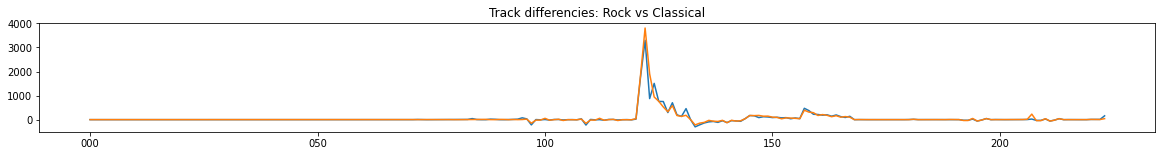

In [10]:
plt.figure(figsize=(20,2))
plt.title("Track differencies: Rock vs Classical")
temp_feat[temp_feat['genre_top']=='Rock'].iloc[1,:224].plot()
temp_feat[temp_feat['genre_top']=='Classical'].iloc[1,:224].plot()

#### Same genre: Hip-Hop first 2 tracks


<AxesSubplot:title={'center':'Track differencies: Hip-Hop vs Hip-Hop'}>

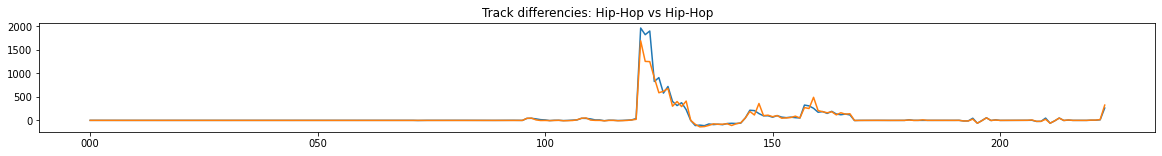

In [11]:
plt.figure(figsize=(20,2))
plt.title("Track differencies: Hip-Hop vs Hip-Hop")
temp_feat.iloc[0,:224].plot()
temp_feat.iloc[1,:224].plot()

#### Same genre:  2 Rock tracks

<AxesSubplot:title={'center':'Track differencies: Rock vs Rock'}>

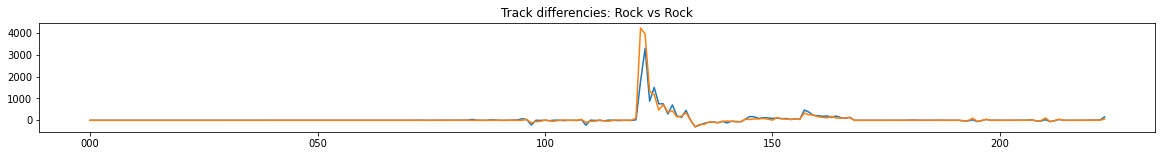

In [12]:
plt.figure(figsize=(20,2))
plt.title("Track differencies: Rock vs Rock")
temp_feat[temp_feat['genre_top']=='Rock'].iloc[1,:224].plot()
temp_feat[temp_feat['genre_top']=='Rock'].iloc[3,:224].plot()

Temporal Features do not appear to be time series.<br>
All tracks have the same patterns which is strange. 

## Extract TS from mp3 songs

In [8]:
import librosa
from sklearn.preprocessing import minmax_scale   #11025

def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

ts,sr = librosa.load("/Volumes/Untitled/untitled folder/fma_small/000/000002.mp3",sr=8000, duration=10)
spect = librosa.feature.spectral_centroid(ts, sr=sr)[0]

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


# Spectral Centroid TS

Time Series generated by extracting the Spectral Centroid from the raw audio wave. 

Text(0.5, 0, 'Time (s)')

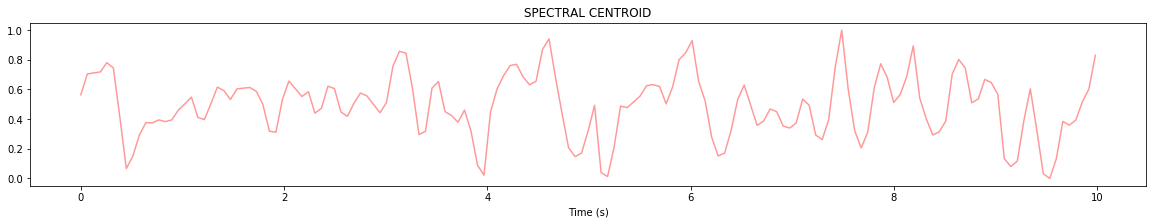

In [61]:
plt.figure(figsize=(20,3))
plt.title('SPECTRAL CENTROID')
e_time = np.arange(len(normalize(spect)))*512/8000
plt.plot(e_time, normalize(spect), color='r', alpha=0.4)
plt.xlabel('Time (s)')

# Raw wave TS

Text(0.5, 0, 'Time (s)')

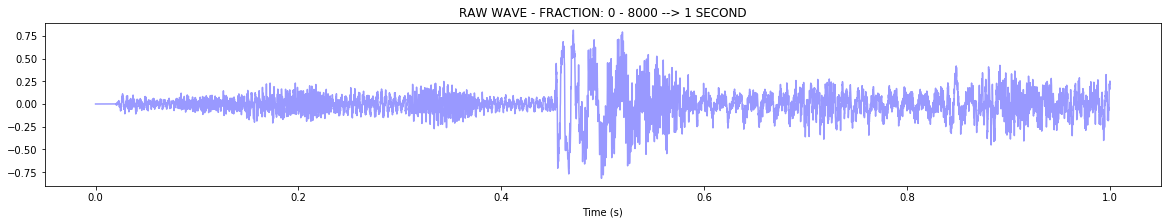

In [62]:
plt.figure(figsize=(20,3))

plt.title("RAW WAVE - FRACTION: 0 - 8000 --> 1 SECOND")
e_time=np.arange(len(ts))*10000/80000000
plt.plot(e_time[0:8000],ts[0:8000], color='b',alpha=0.4)
plt.xlabel("Time (s)")

Text(0.5, 0, 'Time (s)')

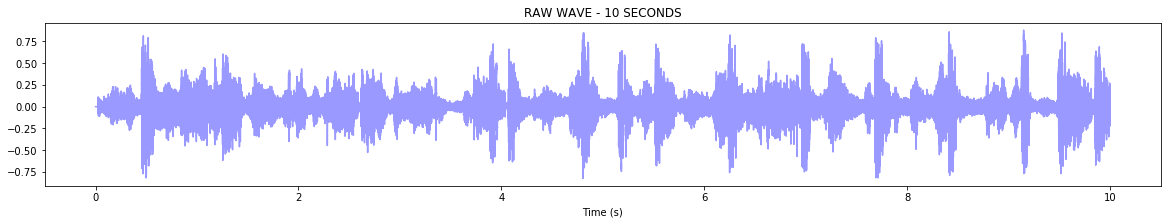

In [63]:
plt.figure(figsize=(20,3))
plt.title("RAW WAVE - 10 SECONDS")
e_time=np.arange(len(ts))*10000/80000000
plt.plot(e_time, ts, color='b',alpha=0.4)
plt.xlabel('Time (s)')

## How does the sampling rate affect the quality of the audio?

In [9]:
import IPython.display as ipd

#### 11050 sr

In [10]:
ts,sr = librosa.load("/Volumes/Untitled/untitled folder/fma_small/000/000002.mp3",sr=11050, duration=10)

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [11]:
ipd.Audio(ts,rate=sr)

#### 8000 sr

In [12]:
ts,sr = librosa.load("/Volumes/Untitled/untitled folder/fma_small/000/000002.mp3",sr=8000, duration=10)

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [13]:
ipd.Audio(ts,rate=sr)

#### 4000 sr

In [14]:
ts,sr = librosa.load("/Volumes/Untitled/untitled folder/fma_small/000/000002.mp3",sr=4000, duration=10)

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [15]:
ipd.Audio(ts,rate=sr)

#### 220 sr

In [16]:
ts,sr = librosa.load("/Volumes/Untitled/untitled folder/fma_small/000/000002.mp3",sr=220, duration=10)

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [17]:
ipd.Audio(ts,rate=sr)

As we decrease the sampling rate the quality of the audio decreases. <br>
Ultimately when the sr is 220 we completely lose the main signal.

# Build Dataset

We can build a dataset with Audio wave. But also features extracted from the .mp3.<br>
For example I extracted the Time Series of the Spectral Centroid.
* Time Series - Full Audio Wave 10 seconds
* Time Series - Spectral Centroid  10 seconds

In [1]:
import librosa
from os import listdir
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import minmax_scale

def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)   # normalize the Spectral Centroid wave

# path folder with .mp3 data
path = '/Volumes/Untitled/untitled folder/fma_small'                  

list_ts_spect_centr = []  #list of spectral centroid Time Series
list_ts = []  # list raw wave Time Series
track_ids = [] # list of time series indexes 

for folder in listdir(path):
    if folder != ".DS_Store" and folder != 'checksums' and folder !='README.txt':                      # ignores irrelevant files
        for track_num in tqdm(listdir( path +'/'+ folder)):
            if track_num != ".DS_Store" and track_num != 'checksums' and track_num !='README.txt':     # ignore irrelevant files 
                track_id = track_num.replace('.mp3', '').lstrip('0')  # format track_id 
                track_path = path +'/'+ folder +'/' + track_num                   
                
                try:                                                                                   # skips corrupted .mp3s 
                    # extract wave TS
                    ts, sr = librosa.load(track_path, sr=8000, duration=10)                           
                    #append time series
                    list_ts.append(ts)
                    track_ids.append(track_id)
                    # compute spectral ts
                    spect = librosa.feature.spectral_centroid(ts, sr=sr)[0]
                    # normalize spectral_centroid
                    spect = normalize(spect)                                                      
                    # append spectral ts
                    list_ts_spect_centr.append(spect)
                except:
                    continue

                

100%|██████████| 61/61 [00:26<00:00,  2.28it/s]


## Save Dataset raw wave time series

In [4]:
# create dataframe raw - time series
ts_df = pd.DataFrame(data=list_ts, index=track_ids)

In [5]:
#--------------------------------------- Pre-processing ----------------------------------------------#

# rename index to "track_id"
ts_df.index.names = ['track_id']
# remove NaN values - some tracks are few sec longer --> I set all tracks to equal length 3597
ts_df.dropna(axis=1, inplace=True)
# temporarly reset index
ts_df.reset_index(inplace=True)
# change type index from object to int
ts_df['track_id'] = ts_df['track_id'].astype(int)
# set track_id as index
ts_df.set_index('track_id', inplace=True)
# change columns type from object to float
columns = ts_df.columns
for col in columns:
    ts_df[col] = ts_df[col].astype(float)   
#-----------------------------------------------------------------------------------------------------#

ts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,79990,79991,79992,79993,79994,79995,79996,79997,79998,79999
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.131447,0.123598,-0.013825,0.109951,0.110994,-0.023067,-0.052947,-0.161152,-0.111934,-0.220588
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.245754,0.246711,0.261976,0.202606,0.134919,0.058916,0.011127,-0.008557,0.018892,0.048548
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.014870,0.021485,0.129311,0.140191,-0.089143,0.013773,0.258749,0.380478,0.226944,0.102497
140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.033255,0.038203,0.044211,0.049413,0.055207,0.058619,0.059693,0.061955,0.058099,0.065684
141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035006,-0.014904,-0.024115,-0.001011,0.009780,0.001428,0.014977,0.022171,0.031856,0.044794


In [6]:
# Dataset info
print(f"___Partition SMALL - Raw wave___\nNumber of time series (tracks):{ts_df.shape[0]}\nLength of time series(columns): {ts_df.shape[1]}")

___Partition SMALL - Raw wave___
Number of time series (tracks):3959
Length of time series(columns): 80000


In [ ]:
# save dataset - raw time series
with open('ts_raw_dataset.csv', mode='w') as dataset:
    dataset.write(ts_df.to_csv())

## Save Dataset Spectral Centroid time series

In [6]:
# create dataframe - spectral centroid time series
ts_spectral_df = pd.DataFrame(data=list_ts_spect_centr, index=track_ids)

#--------------------------------------- Pre-processing ----------------------------------------------#

# rename index to "track_id"
ts_spectral_df.index.names = ['track_id']
# remove NaN values - some tracks are few sec longer --> I set all tracks to equal length 3597
ts_spectral_df.dropna(axis=1, inplace=True)
# temporarly reset index
ts_spectral_df.reset_index(inplace=True)
# change type index from object to int
ts_spectral_df['track_id'] = ts_spectral_df['track_id'].astype(int)
# set track_id as index
ts_spectral_df.set_index('track_id', inplace=True)
# change columns type from object to float
columns = ts_spectral_df.columns
for col in columns:
    ts_spectral_df[col] = ts_spectral_df[col].astype(float)
    
#-----------------------------------------------------------------------------------------------------#

ts_spectral_df.head()

,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,156
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.563658,0.704224,0.711645,0.718079,0.780372,0.745364,0.414509,0.066659,0.149801,0.291402,...,0.324542,0.030986,0.000000,0.133062,0.384260,0.358897,0.393651,0.516269,0.601784,0.829922
5,0.434661,0.188870,0.193288,0.508140,0.650142,0.441281,0.413073,0.499097,0.615291,0.661660,...,0.662978,0.701866,0.851977,1.000000,0.783585,0.684711,0.580746,0.408675,0.339676,0.272865
10,0.615023,0.534671,0.295797,0.119687,0.189722,0.417595,0.574575,0.576665,0.467114,0.363554,...,0.634469,0.829980,0.798660,0.803240,0.847645,0.780118,0.540602,0.363964,0.552574,0.829288
140,0.238596,0.401997,0.505269,0.438209,0.214040,0.553309,0.602027,0.447793,0.417546,0.513653,...,0.257090,0.230591,0.252034,0.244469,0.151732,0.148682,0.287519,0.354328,0.227211,0.038757
141,0.095532,0.102818,0.110157,0.096785,0.073976,0.073784,0.068997,0.116437,0.176158,0.200874,...,0.466454,0.653141,0.693255,0.300253,0.080280,0.206129,0.233427,0.316067,0.303233,0.198269


In [7]:
# Dataset info
print(f"___Partition SMALL - spectralcentroid___\nNumber of time series (tracks):{ts_spectral_df.shape[0]}\nLength of time series(columns): {ts_spectral_df.shape[1]}")

___Partition SMALL - spectralcentroid___
Number of time series (tracks):3959
Length of time series(columns): 157


In [8]:
#saave dataset - spectral centroid time series
with open('ts_spectral_dataset.csv', mode='w') as dataset:
    dataset.write(ts_spectral_df.to_csv())

##### *****************************************************************************************************************************************
##### Now it is possible to attach the genre labels or any other labels to the time series dataset through the "track_id".
##### *****************************************************************************************************************************************


### How to extract time stamps from time series

-0.00019232498190376645 0.00023504678412336944 0.14088417800731345 0.08856447279025327


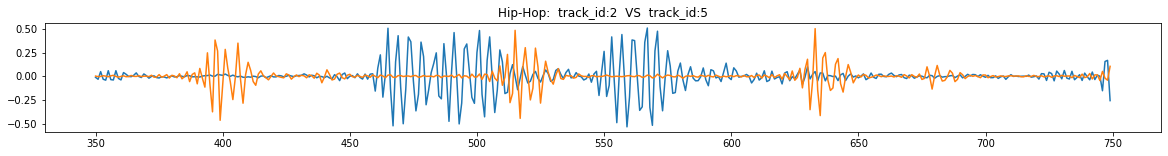

In [34]:
offset = 350
win = 400
ts1 = ts_df.iloc[1, offset:(offset+win)]
ts2 = ts_df.iloc[2, offset:(offset+win)]

# Amplitude Scaling
#ts1 = (ts - ts.mean()) / ts.std()
#ts2 = (ts2 - ts2.mean()) / ts2.std()

plt.figure(figsize=(20,2))
plt.title('Hip-Hop:  track_id:2  VS  track_id:5')
plt.plot(ts1)
plt.plot(ts2)
print(ts1.mean(), ts2.mean(), ts1.std(), ts2.std())